# Generating Data
Firstly, we need to generate the data by using an (exponential) equation with noise. The data mimics the actual data acquired by experiment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Functions

In [2]:
def generate_data(sigma_not, pc, t, noise, n=1000, pmax=25):
    """Generate the data by using an exponential equation with noise.

    Percolation Threshold of Electrical Conductivity
    equation exponential percolation theory:

        sigma = sigma_not * ( p - pc  ) ^ t

    sigma_not, pc, t were fitting coefficients:
    t should be from 1.5 to 2.5; in 3D-system expected value = 2
    pc in percentage (0 to 100%), expected value ~ 0.5 % (or 0.005 real number)

    Parameters
    ----------
    sigma_not : float
        Fitting coefficients
    pc : float
        Fitting coefficients
    t : float
        Fitting coefficients
    noise : float
        Maximum in percentage flucation from real value
    n : int, optional
        Number of samples (number of data generated), by default 1000
    pmax : int, optional
        Maximum in percent, by default 25

    Returns
    -------
    p : ndarray
        Weight fraction
    sigma : ndarray
        The original electrical conductivity of the nanocomposite
    sigma_not : ndarray
        The electrical conductivity of the nanocomposite with noise
    """
    p = np.random.uniform(float(pc), float(pmax), n)
    p[0] = 1.0001*p[0]  # force (p -pc) to not be 0 when 1st value pi = pc
    sigma = sigma_not * np.float_power((p-pc)/100.0, t)
    # add noise
    sigma_noise = sigma * (1+(2*np.random.random(n)-1)*(noise/100.))

    return (p, sigma, sigma_noise)

## Generating a sample

In [3]:
sigma_not = 1000  # S/m
pc = 0.5  # %
t = 2
noise = 50  # %
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# print(p)
# print(sigma)
data = pd.DataFrame({"p": p, "sigma": sigma, "sigma_noise": sigma_noise})
data

,p,sigma,sigma_noise
0,23.553975,53.148576,39.712581
1,14.757412,20.327378,26.801402
2,14.089937,18.468637,21.078314
3,14.376185,19.254850,14.531999
4,1.371059,0.075874,0.090440
...,...,...,...
995,21.972899,46.108538,45.046340
996,17.484900,28.848682,38.862741
997,20.130392,38.535228,56.868562
998,13.708065,17.445298,12.322113


## Plotting noised data vs original data

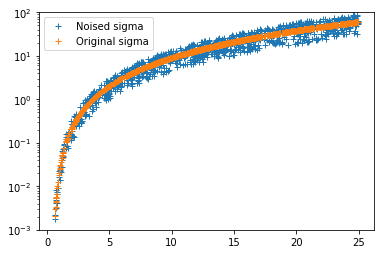

In [4]:
plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.001, 100)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

# Generating data and Saving to files

## Polymers:
Including
* HDPE: High Density Poly Ethylene - a very popular polymer
* HDPE treated: to make filler mix well, and expect to increase conductivity

## Fillers:
Including
* MWCNT: Multiwall Carbon Nanotube
* SWCNT: Single Carbon Nanotube
* GNP: Graphene Nanoplate

## Future note:
* Next version of program should predict complex cases where there are multiple polymers reinforced with different fillers

## Columns in data table
* polymer_1 = "HDPE" : First polymer
* filler_1  = "MWCNT": First filler
* wt_l2     = float  : Weight fraction of 1st filler
* polymer_2 = ""     : Second polymer in the composite
* ratio_1_2 = float  : If there is second polymer, what ratio between 2 polymers?
* filler_2  = ""     : Second filler
* wt_l2     = float  : Weight fraction of 2nd filler
* foaming   = 1 or 0 : foaming or no foam (unfoamed or solid sample)
* conductivity=float : Value of electrical conductivity
* owner     = "owner": the sources or owner of data set

## Data set 1: HDPE & MWCNT

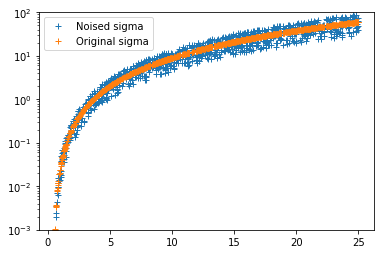

In [5]:
polymer_1 = "HDPE"
filler_1 = "MWCNT"
polymer_2 = ""
ratio_1_2 = ""
filler_2 = ""
wt_l2 = ""
foaming = 0  # no foam
owner = "data set 1"
file_name = "data/"
sigma_not = 1000  # S/m
pc = 0.5  # %
t = 2
noise = 50  # %
# Generate data
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# Save to file
if polymer_2:
    file_name += polymer_1 + "-" + polymer_2
else:
    file_name += polymer_1
file_name += "_"
if filler_2:
    file_name += filler_1 + "-" + filler_2
else:
    file_name += filler_1
file_name += "_" + owner.replace(" ", "-") + ".csv"
# print(filename)
# Save to CSV files
if not wt_l2:
    wt_l2 = p.size * [""]
data_full = pd.DataFrame(
    {
        "polymer_1": p.size * [polymer_1],
        "polymer_p2": p.size * [polymer_2],
        "ratio_1_2": p.size * [ratio_1_2],
        "filler_1": p.size * [filler_1],
        "wt_l1": p,
        "filler_2": p.size * [filler_2],
        "wt_l2": wt_l2,
        "foaming": p.size * [foaming],
        "conductivity": sigma_noise,
        "owner": owner,
    }
)
data_full.to_csv(file_name, index=None)

# np.savetxt(filename, (p,sigma_noise) , delimiter=",")

plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.001, 100)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

## Data set 2: HDPE_treated & MWCNT
Treated HDPE => better mix up => more uniform distribution of filler in polymer => higher conductivity

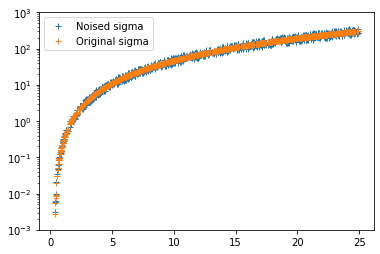

In [6]:
polymer_1 = "HDPEtreated"
filler_1 = "MWCNT"
polymer_2 = ""
ratio_1_2 = ""
filler_2 = ""
wt_l2 = ""
foaming = 0  # no foam
owner = "data set 2"
file_name = "data/"

sigma_not = 5000  # S/m
pc = 0.3  # %
t = 2
noise = 20  # %
# Generate data
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# Save to file
if polymer_2:
    file_name += polymer_1 + "-" + polymer_2
else:
    file_name += polymer_1
file_name += "_"
if filler_2:
    file_name += filler_1 + "-" + filler_2
else:
    file_name += filler_1
file_name += "_" + owner.replace(" ", "-") + ".csv"
# print(filename)
# Save to CSV files
if not wt_l2:
    wt_l2 = p.size * [""]
data_full = pd.DataFrame(
    {
        "polymer_1": p.size * [polymer_1],
        "polymer_p2": p.size * [polymer_2],
        "ratio_1_2": p.size * [ratio_1_2],
        "filler_1": p.size * [filler_1],
        "wt_l1": p,
        "filler_2": p.size * [filler_2],
        "wt_l2": wt_l2,
        "foaming": p.size * [foaming],
        "conductivity": sigma_noise,
        "owner": owner,
    }
)
data_full.to_csv(file_name, index=None)

# np.savetxt(filename, (p,sigma_noise) , delimiter=",")

plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.001, 1000)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

## Data set 3: HDPE & SWCNT

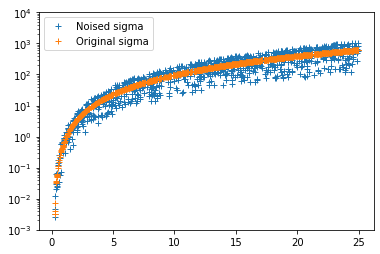

In [7]:
polymer_1 = "HDPE"
filler_1 = "SWCNT"
polymer_2 = ""
ratio_1_2 = ""
filler_2 = ""
wt_l2 = ""
foaming = 0  # no foam
owner = "data set 3"
file_name = "data/"

sigma_not = 10000  # S/m
pc = 0.2  # %
t = 2
noise = 80  # %
# Generate data
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# Save to file
if polymer_2:
    file_name += polymer_1 + "-" + polymer_2
else:
    file_name += polymer_1
file_name += "_"
if filler_2:
    file_name += filler_1 + "-" + filler_2
else:
    file_name += filler_1
file_name += "_" + owner.replace(" ", "-") + ".csv"
# print(filename)
# Save to CSV files
if not wt_l2:
    wt_l2 = p.size * [""]
data_full = pd.DataFrame(
    {
        "polymer_1": p.size * [polymer_1],
        "polymer_p2": p.size * [polymer_2],
        "ratio_1_2": p.size * [ratio_1_2],
        "filler_1": p.size * [filler_1],
        "wt_l1": p,
        "filler_2": p.size * [filler_2],
        "wt_l2": wt_l2,
        "foaming": p.size * [foaming],
        "conductivity": sigma_noise,
        "owner": owner,
    }
)
data_full.to_csv(file_name, index=None)

# np.savetxt(filename, (p,sigma_noise) , delimiter=",")

plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.001, 10000)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

## Data set 4: HDPE + GNP
Note: Polymer is not treated => bad conductivity, high threshold (`pc`) to be conductive

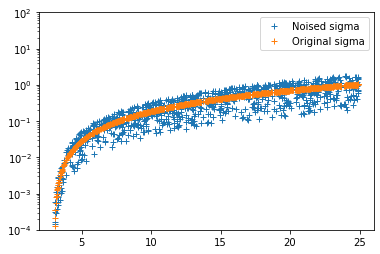

In [8]:
polymer_1 = "HDPE"
filler_1 = "GNP"
polymer_2 = ""
ratio_1_2 = ""
filler_2 = ""
wt_l2 = ""
foaming = 0  # no foam
owner = "data set 4"
file_name = "data/"

sigma_not = 10  # S/m
pc = 3  # %
t = 1.5
noise = 80  # %
# Generate data
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# Save to file
if polymer_2:
    file_name += polymer_1 + "-" + polymer_2
else:
    file_name += polymer_1
file_name += "_"
if filler_2:
    file_name += filler_1 + "-" + filler_2
else:
    file_name += filler_1
file_name += "_" + owner.replace(" ", "-") + ".csv"
# print(filename)
# Save to CSV files
if not wt_l2:
    wt_l2 = p.size * [""]
data_full = pd.DataFrame(
    {
        "polymer_1": p.size * [polymer_1],
        "polymer_p2": p.size * [polymer_2],
        "ratio_1_2": p.size * [ratio_1_2],
        "filler_1": p.size * [filler_1],
        "wt_l1": p,
        "filler_2": p.size * [filler_2],
        "wt_l2": wt_l2,
        "foaming": p.size * [foaming],
        "conductivity": sigma_noise,
        "owner": owner,
    }
)
data_full.to_csv(file_name, index=None)

# np.savetxt(filename, (p,sigma_noise) , delimiter=",")

plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.0001, 100)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

## Data set 5: HDPE_treated + GNP
Now polymer is treated => better conductivity, lower threshold

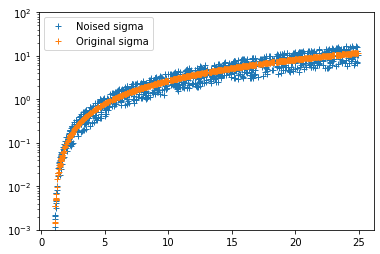

In [9]:
polymer_1 = "HDPEtreated"
filler_1 = "GNP"
polymer_2 = ""
ratio_1_2 = ""
filler_2 = ""
wt_l2 = ""
foaming = 0  # no foam
owner = "data set 5"
file_name = "data/"

sigma_not = 100  # S/m
pc = 1  # %
t = 1.5
noise = 50  # %
# Generate data
p, sigma, sigma_noise = generate_data(sigma_not, pc, t, noise)
# Save to file
if polymer_2:
    file_name += polymer_1 + "-" + polymer_2
else:
    file_name += polymer_1
file_name += "_"
if filler_2:
    file_name += filler_1 + "-" + filler_2
else:
    file_name += filler_1
file_name += "_" + owner.replace(" ", "-") + ".csv"
# print(filename)
# Save to CSV files
if not wt_l2:
    wt_l2 = p.size * [""]
data_full = pd.DataFrame(
    {
        "polymer_1": p.size * [polymer_1],
        "polymer_p2": p.size * [polymer_2],
        "ratio_1_2": p.size * [ratio_1_2],
        "filler_1": p.size * [filler_1],
        "wt_l1": p,
        "filler_2": p.size * [filler_2],
        "wt_l2": wt_l2,
        "foaming": p.size * [foaming],
        "conductivity": sigma_noise,
        "owner": owner,
    }
)
data_full.to_csv(file_name, index=None)

# np.savetxt(filename, (p,sigma_noise) , delimiter=",")

plt.plot(p, sigma_noise, marker="+", linestyle="None")
plt.plot(p, sigma, marker="+", linestyle="None")
plt.yscale("log")
plt.ylim(0.001, 100)
plt.legend(["Noised sigma", "Original sigma"])
plt.show()

# Import ALLs into ONE and save a new file

In [10]:
import glob
import os

path = "data/"  # use your path
all_files = glob.glob(path + "*.csv")
file_name_all_data = "_nanocomposite_data.csv"
li = []

for filename in all_files:
    head, tail = os.path.split(filename)
    if tail == file_name_all_data:
        continue
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

alldata = pd.concat(li, axis=0, ignore_index=True)
alldata.to_csv(path + file_name_all_data, index=None)

data\HDPEtreated_GNP_data-set-5.csv
data\HDPEtreated_MWCNT_data-set-2.csv
data\HDPE_GNP_data-set-4.csv
data\HDPE_MWCNT_data-set-1.csv
data\HDPE_SWCNT_data-set-3.csv
